## IMPORTING ALL THE LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,CategoricalNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from pickle import dump

## DATASET IMPORTING

In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Placement_Data_Full_Class.csv")

In [3]:
data = data.drop(['sl_no'],axis=1)

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## EXPLONETORY DATA ANALYSIS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


* in this dataset 6 columns are in float type and 8 columns are in object type

In [6]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

* in this dataset "salary" column contains NULL/NAN values

In [7]:
(data.isna().mean()*100)

gender             0.000000
ssc_p              0.000000
ssc_b              0.000000
hsc_p              0.000000
hsc_b              0.000000
hsc_s              0.000000
degree_p           0.000000
degree_t           0.000000
workex             0.000000
etest_p            0.000000
specialisation     0.000000
mba_p              0.000000
status             0.000000
salary            31.162791
dtype: float64

In [8]:
fv = data.drop(["status"],axis=1)
cv = data[["status"]]

<AxesSubplot:>

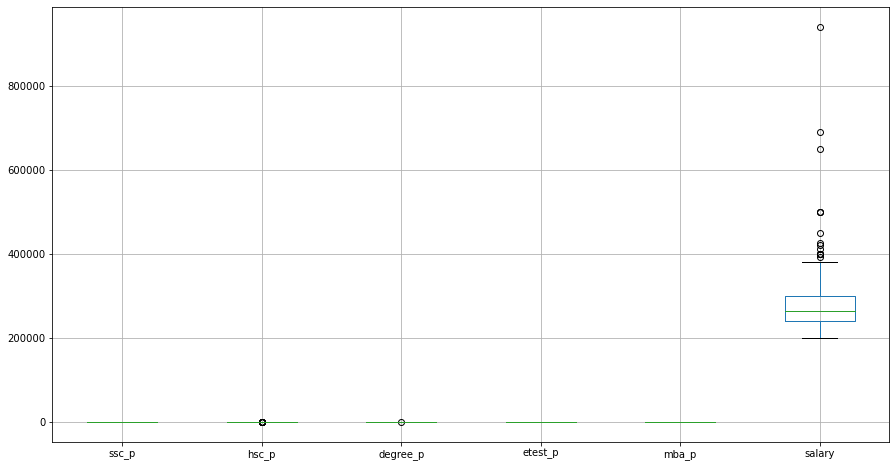

In [9]:
ob=[]
it=[]
for i in fv.columns:
    if (fv[i].dtype)=="O":
        ob.append(i)
    else:
        it.append(i)
plt.figure(figsize=(15,8))
fv[it].boxplot()

* only "salary" column contain outliers

<AxesSubplot:>

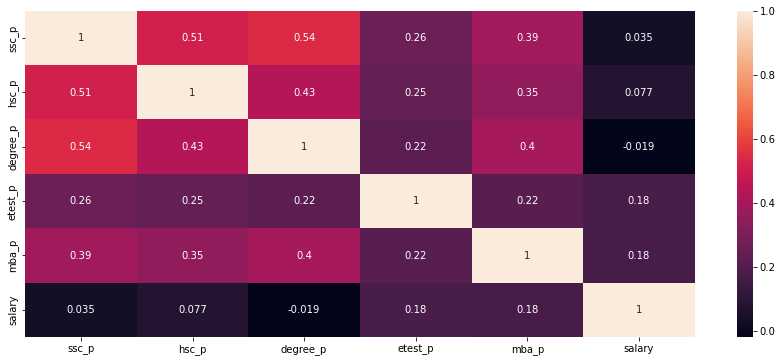

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

* in this dataset "degree_p" & "ssc_p" columns and "hsc_p" & "ssc_p" columns are have some co-relation

<BarContainer object of 2 artists>

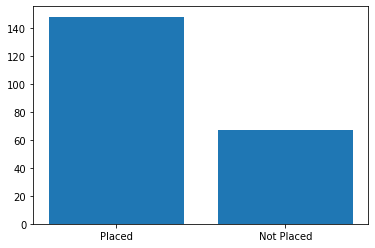

In [11]:
plt.bar(cv['status'].unique(),cv.value_counts().values)

* it is a highley imbalenced dataset we need to balence this

## SPLITTING DATASET AS Xi's & Yi'S

In [12]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,train_size=0.8,stratify=cv,random_state=1)

In [13]:
x_train = x_train.reset_index(drop=True)

In [14]:
ob

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

In [15]:
ohe = OneHotEncoder()
oh_d = ohe.fit_transform(x_train[ob]).toarray()
tr_d = pd.DataFrame(oh_d)

In [16]:
cl_n = ohe.get_feature_names().tolist()

In [17]:
x_train[cl_n] = tr_d

In [18]:
x_train = x_train.drop(ob,axis=1)

In [19]:
x_tc = x_train.copy()

In [20]:
x_tc['salary'] = x_tc['salary'].fillna(0)

In [21]:
#si = SimpleImputer()
#im_d = si.fit_transform(x_tc)
#ip_d = pd.DataFrame(im_d,columns=x_train.columns)

In [22]:
#sns.distplot(ip_d['salary'])
#sns.distplot(x_train['salary'])

In [23]:
y_train.value_counts()

status    
Placed        118
Not Placed     54
dtype: int64

In [24]:
y_train.value_counts()/len(cv)

status    
Placed        0.548837
Not Placed    0.251163
dtype: float64

* this dataset is highley imbalenced so we need to balence it

In [25]:
y_train = y_train.reset_index(drop=True)

In [26]:
y_train

,status
0,Not Placed
1,Placed
2,Placed
3,Placed
4,Placed
...,...
167,Placed
168,Not Placed
169,Placed
170,Placed


* Resetted indexes on y_train

In [27]:
ros = RandomOverSampler()
x,y = ros.fit_resample(x_tc,y_train)

* successfully balenced my data

In [28]:
x_train = pd.DataFrame(x)
y_train = pd.DataFrame(y)

* these are the our final datasets

In [29]:
x_train.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,x0_F,x0_M,x1_Central,x1_Others,...,x3_Arts,x3_Commerce,x3_Science,x4_Comm&Mgmt,x4_Others,x4_Sci&Tech,x5_No,x5_Yes,x6_Mkt&Fin,x6_Mkt&HR
0,64.0,70.2,61.0,50.00,62.50,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,74.9,57.0,62.0,80.00,60.78,360000.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,67.0,68.0,64.0,74.40,53.49,300000.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,60.4,66.6,65.0,71.00,52.71,220000.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,73.0,79.0,72.0,91.34,61.29,231000.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## CREATING THE MODEL

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_train,y_train)

In [31]:
gnb = GaussianNB()
gmodel = gnb.fit(x_train,y_train)

* succesfully created knn & Naive Bayes models

## TEST THE MODEL

## ON KNN

In [32]:
x_test = x_test.reset_index(drop=True)

In [33]:
oh = ohe.transform(x_test[ob]).toarray()
s = pd.DataFrame(oh)
s1 = ohe.get_feature_names()
x_test[s1] = s

In [34]:
x_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,x3_Arts,x3_Commerce,x3_Science,x4_Comm&Mgmt,x4_Others,x4_Sci&Tech,x5_No,x5_Yes,x6_Mkt&Fin,x6_Mkt&HR
0,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,F,69.0,Others,62.0,Others,Commerce,69.00,Comm&Mgmt,Yes,67.00,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,M,84.2,Central,69.4,Central,Science,65.00,Sci&Tech,Yes,80.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,M,65.0,Central,71.5,Others,Commerce,62.80,Comm&Mgmt,Yes,57.00,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


* onehotencoder applied dataset 

* from this dataset we need to drop object columns

In [35]:
x_test = x_test.drop(ob,axis=1)

In [36]:
x_test['salary'] = x_test['salary'].fillna(0)

In [37]:
x_test.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,x0_F,x0_M,x1_Central,x1_Others,...,x3_Arts,x3_Commerce,x3_Science,x4_Comm&Mgmt,x4_Others,x4_Sci&Tech,x5_No,x5_Yes,x6_Mkt&Fin,x6_Mkt&HR
0,43.0,60.0,65.00,92.66,62.92,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,69.0,62.0,69.00,67.00,62.35,240000.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,84.2,69.4,65.00,80.00,52.72,255000.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,65.0,71.5,62.80,57.00,56.60,265000.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,55.0,49.8,67.25,55.00,51.58,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## ON KNN ACCURACY SCORE

In [38]:
pridcted = model.predict(x_test)
accuracy_score(pridcted,y_test)

1.0

## ON NAIVEBAYES ACCURACY SCORE

In [39]:
pridicting = gmodel.predict(x_test)
accuracy_score(pridicting,y_test)

1.0

## SAVING THE FINAL MODEL

In [40]:
import joblib

In [41]:
joblib.dump(model,"final.joblib")

['final.joblib']

In [42]:
joblib.dump(gmodel,"f1.joblib")

['f1.joblib']

In [43]:
knn = joblib.load("final.joblib")
gn = joblib.load("f1.joblib")

## TEST WITH UNSEEN DATA

In [44]:
my_dict = {'gender':"M",'ssc_p':55.06,"ssc_b":"Others","hsc_p":90.04,"hsc_b":"Central","hsc_s":"Science","degree_p":54.09,"degree_t":"Sci&Tech","workex":"Yes","etest_p":67.59,"specialisation":"Mkt&HR","mba_p":67.04,"salary":287654.00}
s = pd.DataFrame([my_dict])

In [45]:
s5 = s.copy()

## APPPLYINNG ONE HOT ENCODER ON UNSEEN DATA

In [46]:
d = ohe.transform(s[ob]).toarray()

In [47]:
d1 = ohe.get_feature_names()

In [48]:
d2 = pd.DataFrame(d)

In [49]:
s[d1] = d2

In [50]:
s = s.drop(ob,axis=1)

## FOR CLASS - 1 ON UNSEEN DATA

In [51]:
s.loc[[0]]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,x0_F,x0_M,x1_Central,x1_Others,...,x3_Arts,x3_Commerce,x3_Science,x4_Comm&Mgmt,x4_Others,x4_Sci&Tech,x5_No,x5_Yes,x6_Mkt&Fin,x6_Mkt&HR
0,55.06,90.04,54.09,67.59,67.04,287654.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [52]:
knn.predict(s.loc[[0]])

array(['Placed'], dtype=object)

In [53]:
gn.predict(s.loc[[0]])

array(['Placed'], dtype='<U10')

In [54]:
x_test.loc[[0]]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,x0_F,x0_M,x1_Central,x1_Others,...,x3_Arts,x3_Commerce,x3_Science,x4_Comm&Mgmt,x4_Others,x4_Sci&Tech,x5_No,x5_Yes,x6_Mkt&Fin,x6_Mkt&HR
0,43.0,60.0,65.0,92.66,62.92,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## FOR CLASS - 2

In [55]:
knn.predict(x_test.loc[[0]])

array(['Not Placed'], dtype=object)

In [56]:
gn.predict(x_test.loc[[0]])

array(['Not Placed'], dtype='<U10')

## FOR CLASS - 2 ON UNSEEN DATA

In [57]:
s5['salary'] = s5['salary'].replace(287654.0,0.0)

In [58]:
s5

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,55.06,Others,90.04,Central,Science,54.09,Sci&Tech,Yes,67.59,Mkt&HR,67.04,0.0


In [59]:
d2 = ohe.transform(s5[ob]).toarray()
d3 = ohe.get_feature_names()
s5[d3] = d2
s5 = s5.drop(ob,axis=1)

In [60]:
s5

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,x0_F,x0_M,x1_Central,x1_Others,...,x3_Arts,x3_Commerce,x3_Science,x4_Comm&Mgmt,x4_Others,x4_Sci&Tech,x5_No,x5_Yes,x6_Mkt&Fin,x6_Mkt&HR
0,55.06,90.04,54.09,67.59,67.04,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [61]:
knn.predict(s5.loc[[0]])

array(['Not Placed'], dtype=object)

In [62]:
gn.predict(s5.loc[[0]])

array(['Not Placed'], dtype='<U10')

In [63]:
joblib.dump(model,r"C:\Users\HP\Downloads\MACHINE LEARNING SECIAL\placement.joblib")

['C:\\Users\\HP\\Downloads\\MACHINE LEARNING SECIAL\\placement.joblib']

In [64]:
joblib.dump(ohe,r"C:\Users\HP\Downloads\MACHINE LEARNING SECIAL\ohe.joblib")

['C:\\Users\\HP\\Downloads\\MACHINE LEARNING SECIAL\\ohe.joblib']